In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import os
import re

from matplotlib.ticker import EngFormatter
from glob import glob

In [2]:
DATA_ROOT = '../data/fakes/output/'

# M31

In [3]:
folder = os.path.join(DATA_ROOT, 'FID695')

path_pattern = os.path.join(folder, '*.csv')
paths = sorted(glob(path_pattern))

assert len(paths) == 16

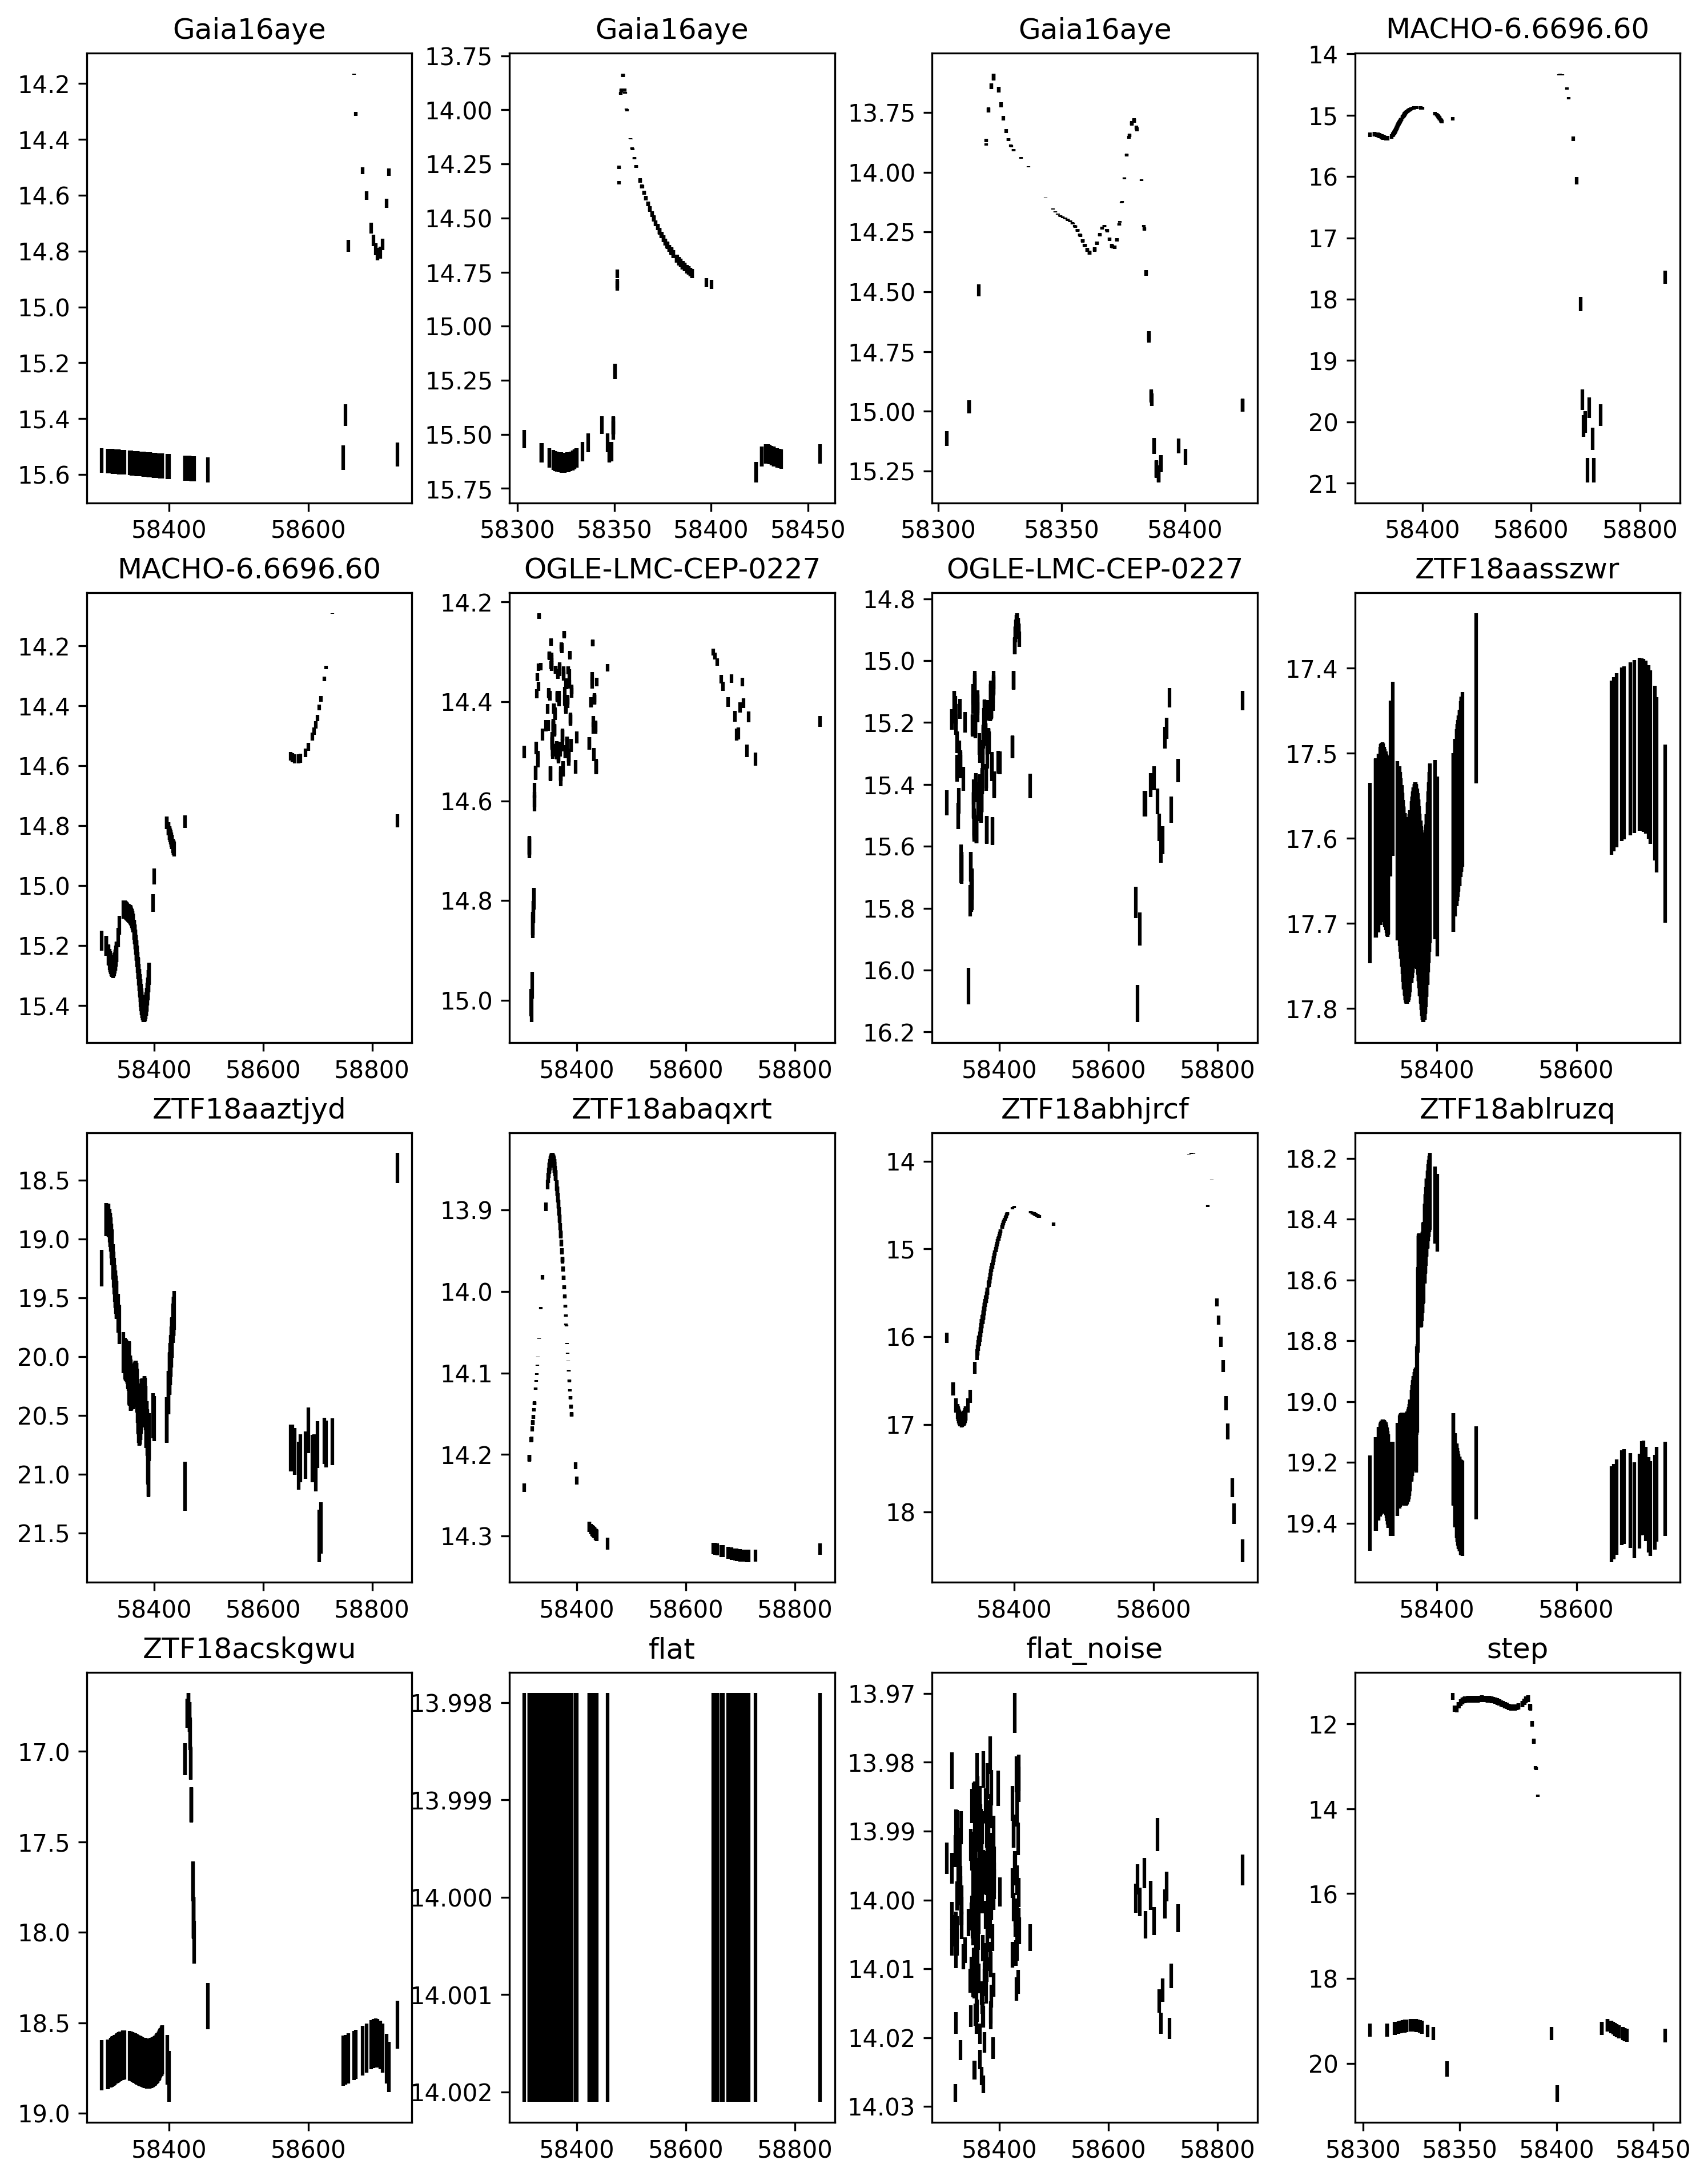

In [4]:
fig, ax_ = plt.subplots(4, 4, figsize=(12, 16), dpi=300)
plt.subplots_adjust(wspace=0.3)
for path, ax in zip(paths, ax_.flat):
    data = pd.read_csv(path)
    filename = os.path.basename(path)
    name = re.match(r'^[^_]+(?:_noise)?', filename).group()
    ax.set_title(name)
    ax.invert_yaxis()
    y_ticks_fmt = ax.get_yaxis().get_major_formatter()
    y_ticks_fmt.set_useOffset(False)
    ax.errorbar(data['mjd'], data['mag'], data['magerr'], ls='', color='k')
fig.savefig('../figs/fakes_lc.pdf')